# Lesson 6.5

## Load Data

In [163]:
# Load the data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Iris.csv")
print(data.head())

## Create training and testing sets
## y = petal Length
Y = data.iloc[:,5]

## x = pedal and sepal widths and lengths
X = data.iloc[:,1:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Goal: Use data to find Species
- Supervised because we have the Species in our dataset
- Classification because the data is categorical


# Decision Tree:

|--- feature_2 <= 2.45
|   |--- class: Iris-setosa
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- class: Iris-versicolor
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: Iris-virginica
|   |--- feature_3 >  1.75
|   |   |--- class: Iris-virginica



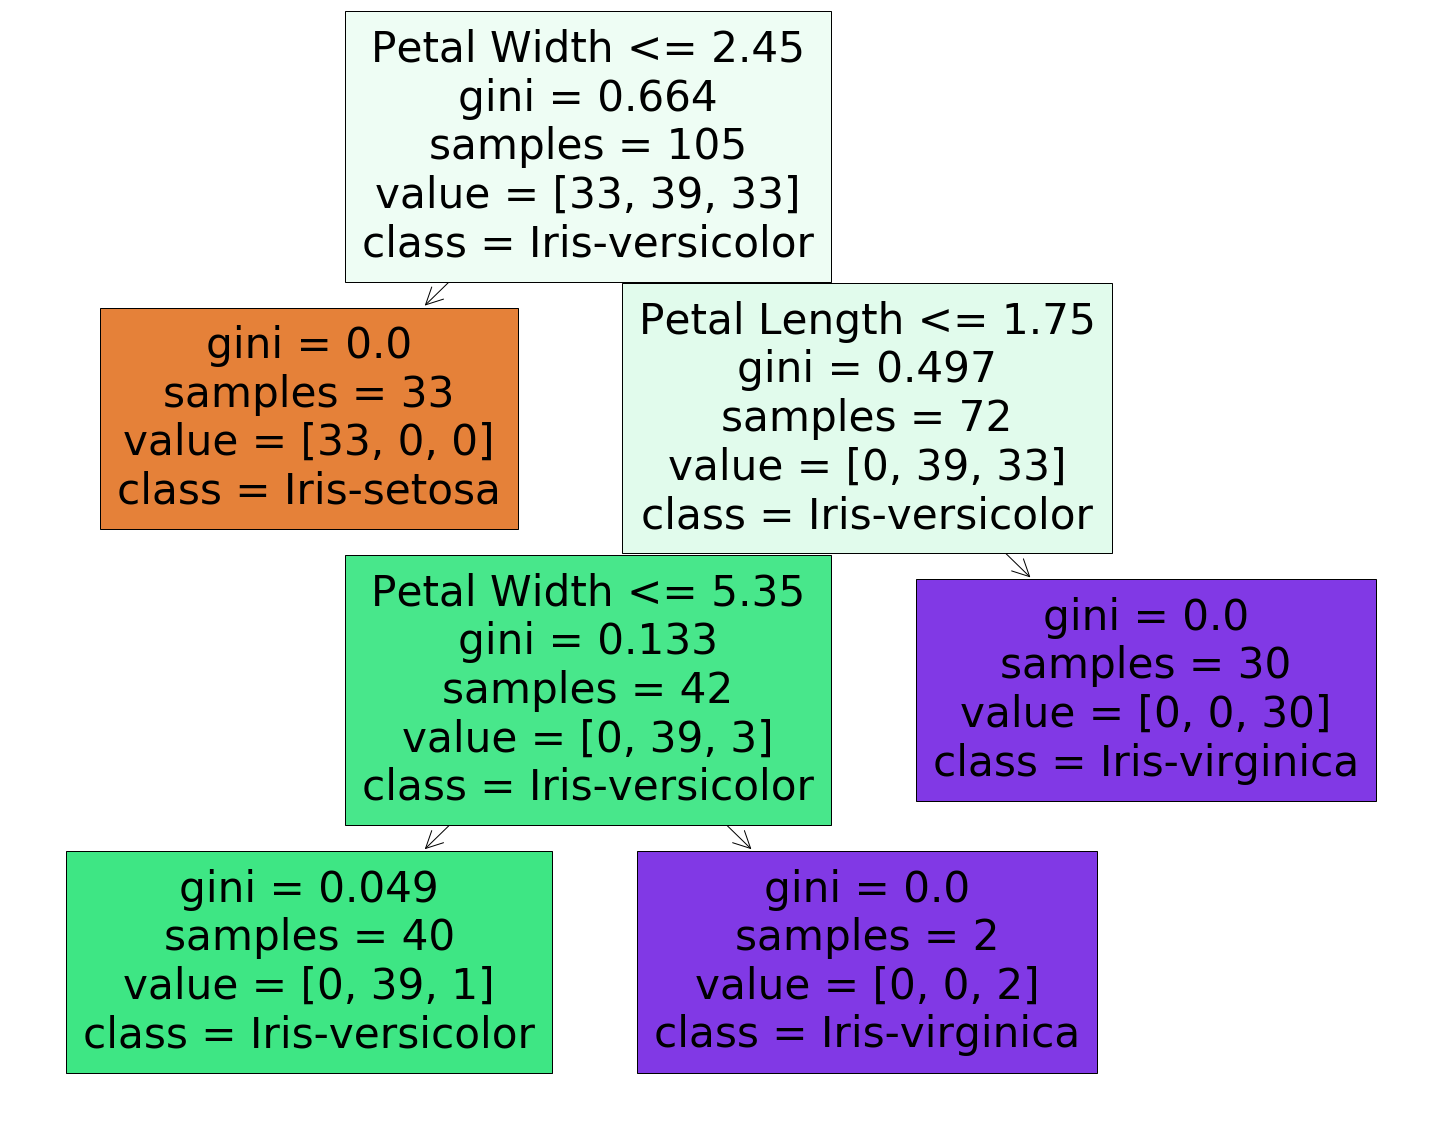

In [164]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

model = DecisionTreeClassifier(max_depth=3)
clf = model.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
plt = tree.plot_tree(clf,feature_names=["Sepal Width", "Sepal Length", "Petal Width", "Petal Length"],  class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],filled=True)

r = export_text(clf)
print(r)

### Evaluating Model's Performance

In [165]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.93        45
      macro avg       0.92      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Report Matrix:
 [[17  0  0]
 [ 0 10  1]
 [ 0  2 15]]
Accuracy: 0.9333333333333333


# Nearest Neighbours:

In [166]:
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5,metric = "euclidean")
clf = model.fit(X_train, y_train)

### Evaluating Model's Performance

In [167]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Report Matrix:
 [[17  0  0]
 [ 0 11  0]
 [ 0  1 16]]
Accuracy: 0.9777777777777777


# Naive Bayes:

In [168]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Evaluating Model's Performance

In [169]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.83      0.91      0.87        11
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.93        45
      macro avg       0.92      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Report Matrix:
 [[17  0  0]
 [ 0 10  1]
 [ 0  2 15]]
Accuracy: 0.9333333333333333


# LDA:

In [170]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

### Evaluating Model's Performance

In [171]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.94      0.94      0.94        17

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Report Matrix:
 [[17  0  0]
 [ 0 10  1]
 [ 0  1 16]]
Accuracy: 0.9555555555555556


# SVM:

In [172]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model.fit(X_train, y_train)

SVC(gamma='auto')

### Evaluating Model's Performance

In [173]:
y_pred = model.predict(X_test)

from sklearn import metrics
print('Report:', metrics.classification_report(y_test, y_pred))
print('Report Matrix:\n', metrics.confusion_matrix(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.94      0.97        17

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Report Matrix:
 [[17  0  0]
 [ 0 11  0]
 [ 0  1 16]]
Accuracy: 0.9777777777777777


# Cross Validation

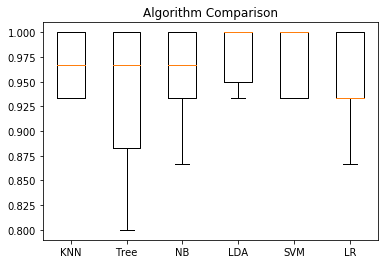

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Species']
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('Tree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()